# MNIST Dataset Machine Learning - Week 3

In [5]:
#the following code is pasted from [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

print(np.__version__)

#not from [1]:

from IPython.display import clear_output

mnist = keras.datasets.mnist   #load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #obtain test and training images

print("Size of trainig images:", np.size(train_images))
print("Shape of testing images:", np.shape(train_images)) #60,000 images... each of 28x28 pixel size

2.6.0
1.19.5
Size of trainig images: 47040000
Shape of testing images: (60000, 28, 28)


## Part 1: Add Noise to MNIST Images:

In [2]:
def images_with_noise(image,y_noise):
    '''Images with noise added
    Inputs:
    image: the MNIST image(s) that we want to add noise to
    y_noise: max range of 'uniform distribution'(noise)
    
    Output:
    image + noise: array of the image with noise
    '''
    return image + np.random.uniform(0, y_noise,size = image.shape)

#### Example of Image with Added Noise:

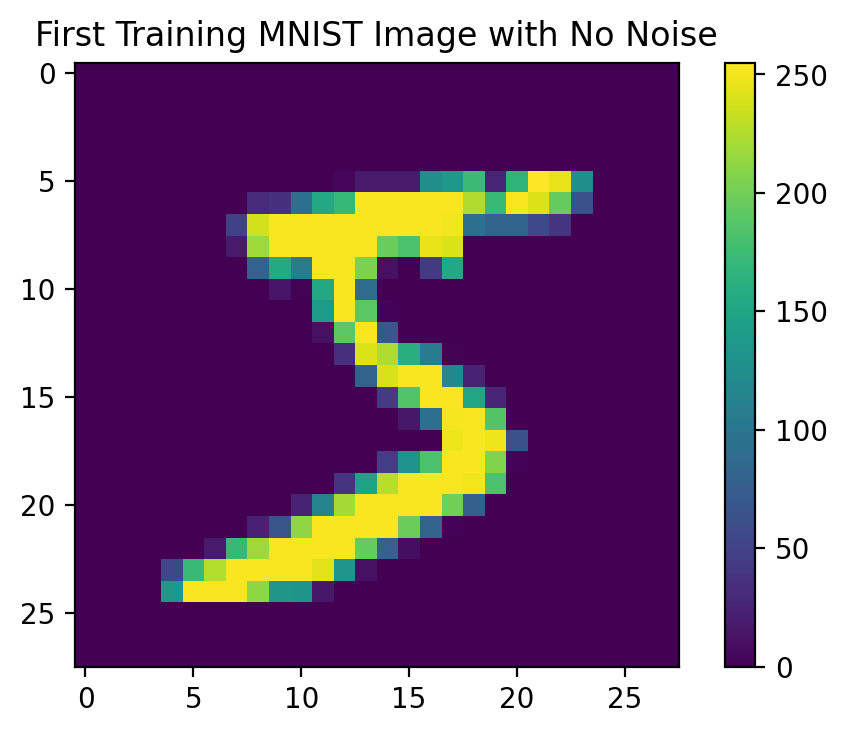

In [3]:
#First display with no noise:
plt.imshow(train_images[0])
plt.colorbar()
plt.title("First Training MNIST Image with No Noise")
plt.show()

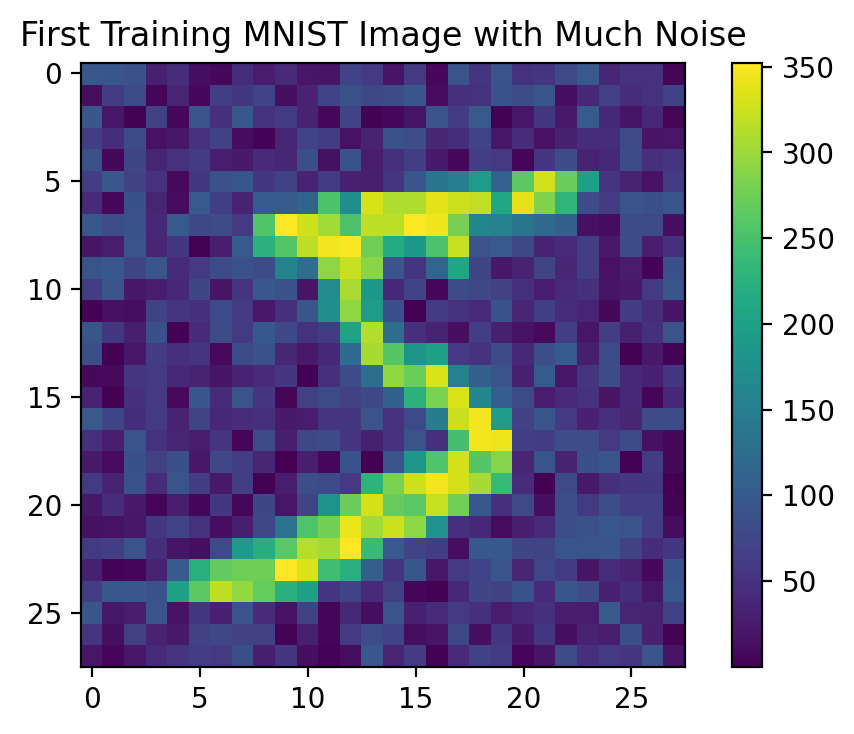

In [4]:
#Now show image with a lot of noise:
plt.imshow(images_with_noise(train_images[0],100))
plt.colorbar()
plt.title("First Training MNIST Image with Much Noise")
plt.show()

### Part 2: Training a Nueral Network

In [5]:
#Create a nueral network with input nuerons of 28x28 for each pixel of the input image. 
#Then, crease a hidden layer with 128 nuerons and an output layer with 10 nuerons. 
#And use the reLU activation function.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer of 28x28 nuerons
    keras.layers.Dense(128,activation='relu'), #hidden layer of 128 nuerons
    keras.layers.Dense(10) #output layer of 10 nuerons
])

In [6]:
#Transform the nueral network from a layered model to a compiled model and determine the loss function, optimiser and metrics:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

In [7]:
#Normalise pixel values:
train_images=train_images/255.0 #255 is the highest pixel val...so dividing each by 255 will mean the range will be 0 to 1
test_images=test_images/255.0

In [8]:
#use the nueral network to determine the training images:
history=model.fit(train_images, train_labels, batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 2s 2ms/step - loss: 0.3365 - accuracy: 0.9061
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1564 - accuracy: 0.9549
Epoch 3/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1100 - accuracy: 0.9680
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0844 - accuracy: 0.9750
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0664 - accuracy: 0.9809
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0545 - accuracy: 0.9840
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0449 - accuracy: 0.9866
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0381 - accuracy: 0.9890
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0312 - accuracy: 0.9916
Epoch 10/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0264 - accuracy: 0.9927

#### Comments:

The network achieved a final acccuracy of 99.98% which is more than the 95% minimum requirement. This tells us that our network is accurate and working.

## Part 3:  Use the above network training to make a plot of Test Accuracy vs $y_{noise}$ 

313/313 - 0s - loss: 0.0879 - accuracy: 0.9805
313/313 - 0s - loss: 0.1614 - accuracy: 0.9654
313/313 - 0s - loss: 0.6871 - accuracy: 0.8640
313/313 - 0s - loss: 2.3750 - accuracy: 0.6839
313/313 - 0s - loss: 4.8650 - accuracy: 0.5844
313/313 - 0s - loss: 7.6129 - accuracy: 0.5262
313/313 - 0s - loss: 10.3734 - accuracy: 0.4890
313/313 - 0s - loss: 13.1973 - accuracy: 0.4654
313/313 - 0s - loss: 16.0610 - accuracy: 0.4394
313/313 - 0s - loss: 18.6670 - accuracy: 0.4229
313/313 - 0s - loss: 21.6830 - accuracy: 0.4021
313/313 - 0s - loss: 24.4618 - accuracy: 0.3877
313/313 - 0s - loss: 27.5302 - accuracy: 0.3748
313/313 - 0s - loss: 30.3839 - accuracy: 0.3655
313/313 - 0s - loss: 33.1170 - accuracy: 0.3603
313/313 - 0s - loss: 36.1375 - accuracy: 0.3424
313/313 - 0s - loss: 39.1926 - accuracy: 0.3261
313/313 - 0s - loss: 42.0275 - accuracy: 0.3224
313/313 - 0s - loss: 45.1396 - accuracy: 0.3134
313/313 - 0s - loss: 48.0811 - accuracy: 0.3082
313/313 - 0s - loss: 51.1366 - accuracy: 0.299

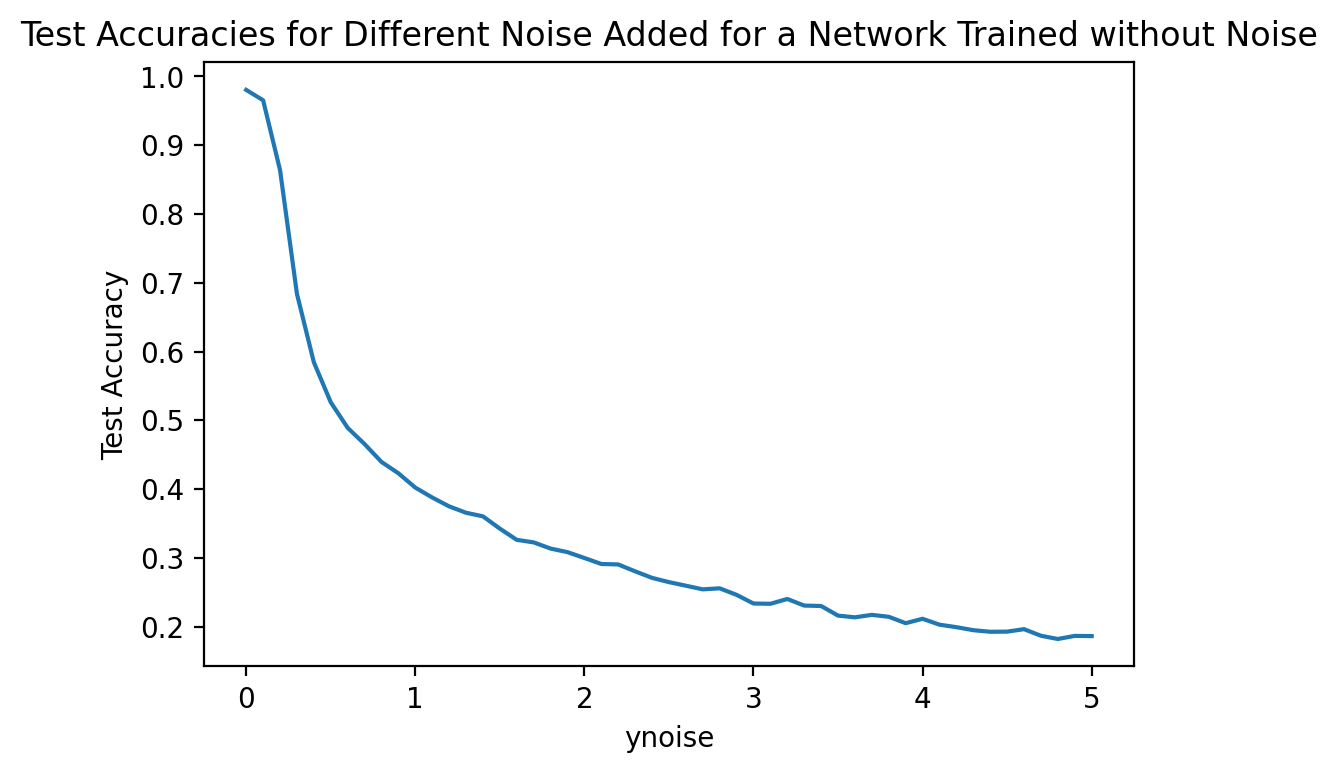

In [9]:
ynoise_values = np.linspace(0,5,51) # array of ynoise values between 0 and 5 

test_accuracy = [] #initial empty array of accuracy
for i in range(51): #use a for loop to obtain accuracy for different ynoise
    #evaluate model and obtain accuracy for the last epoch:
    test_loss, test_acc = model.evaluate(images_with_noise(test_images,  ynoise_values[i]),  test_labels, verbose=2) 
    test_accuracy.append(test_acc) #put accuracy vals for diff ynoise into array outside loop
    
plt.figure()
plt.plot(np.linspace(0,5,51), test_accuracy)
plt.xlabel("ynoise")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracies for Different Noise Added for a Network Trained without Noise")
plt.show()

#### Comments:

The network loses accuracy when the noise increases which is expected since the network isnt trained using the specific noisy data.

## Part 4: Retraining the Network with Noise

In [10]:
#add 0.5 of ynoise to the training images:
history=model.fit(images_with_noise(train_images,0.5), train_labels,batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1592 - accuracy: 0.9617
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0505 - accuracy: 0.9825
Epoch 3/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0328 - accuracy: 0.9886
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0225 - accuracy: 0.9921
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0178 - accuracy: 0.9933
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0103 - accuracy: 0.9968
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0104 - accuracy: 0.9965
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0077 - accuracy: 0.9979
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9987
Epoch 10/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0103 - accuracy: 0.9966

Use the above network training to make a plot of Test Accuracy vs $y_{noise}$ like before: 

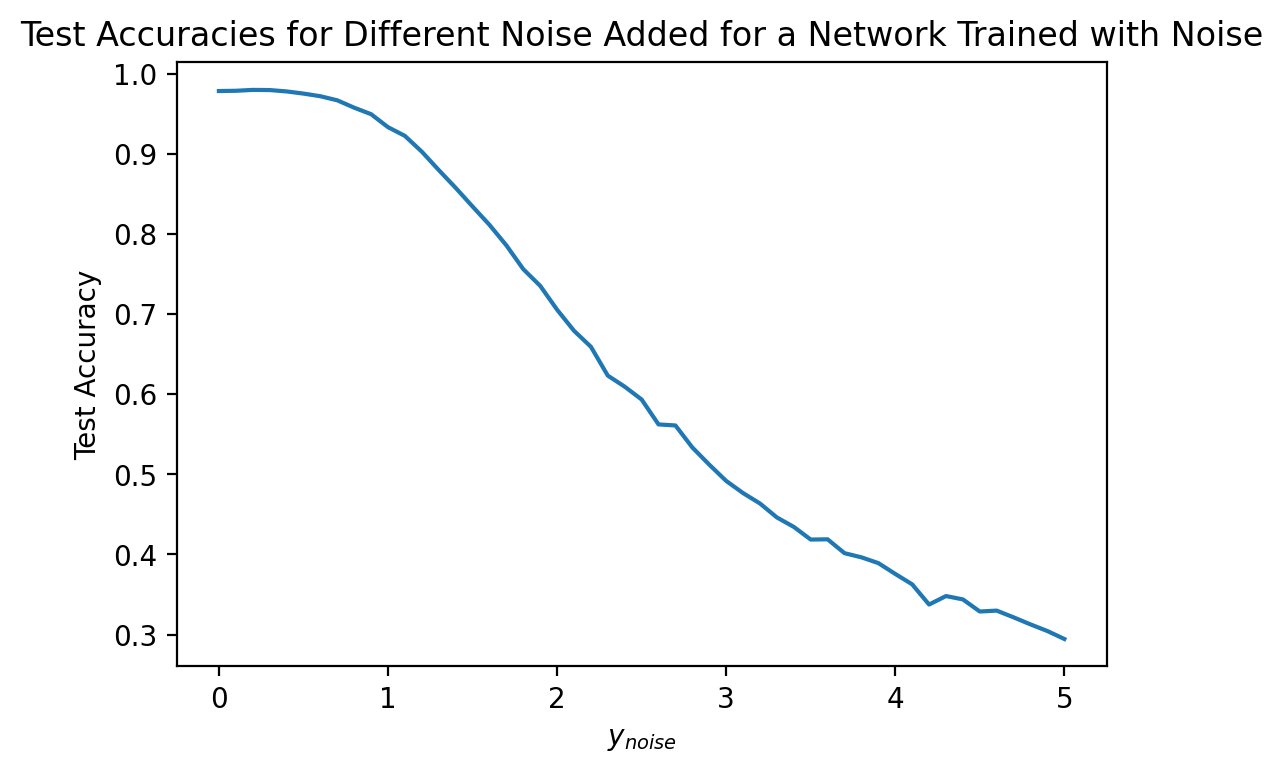

In [12]:
ynoise_values = np.linspace(0,5,51)

test_accuracy = []
for i in range(51):
    test_loss, test_acc = model.evaluate(images_with_noise(test_images,  ynoise_values[i]),  test_labels, verbose=2)
    clear_output(wait=True) #to clear test_acc output once finished
    test_accuracy.append(test_acc)
    
plt.figure()
plt.plot(np.linspace(0,5,51), test_accuracy)
plt.xlabel("$y_{noise}$")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracies for Different Noise Added for a Network Trained with Noise")
plt.show()

#### Comments:

The network is now more accurate since it has been trained with noisy data. From the plot, you can see that after about 0.5 ynoise,  the accuracy decreases sharply. This is because the nwetork was trained using 0.5 ynoise. So, anything more than that, the network will not have seen before and therefore fall in accuracy.

## Part 5: Determine the Best Level of Noise to Add to Training Dataset to Maximise the Performance

We will now add noise to the traning data then run the nueral network (after the new noisy data has trained the network) for different noisy data. This will give us a good indication as to the best level of noise to add to your training dataset to maximise the performance. This is because the best noise level will be one that maximises the test accuracy. We will use a for loop to input different noises into the training data and test data and run the network for the said noisy training and test data.

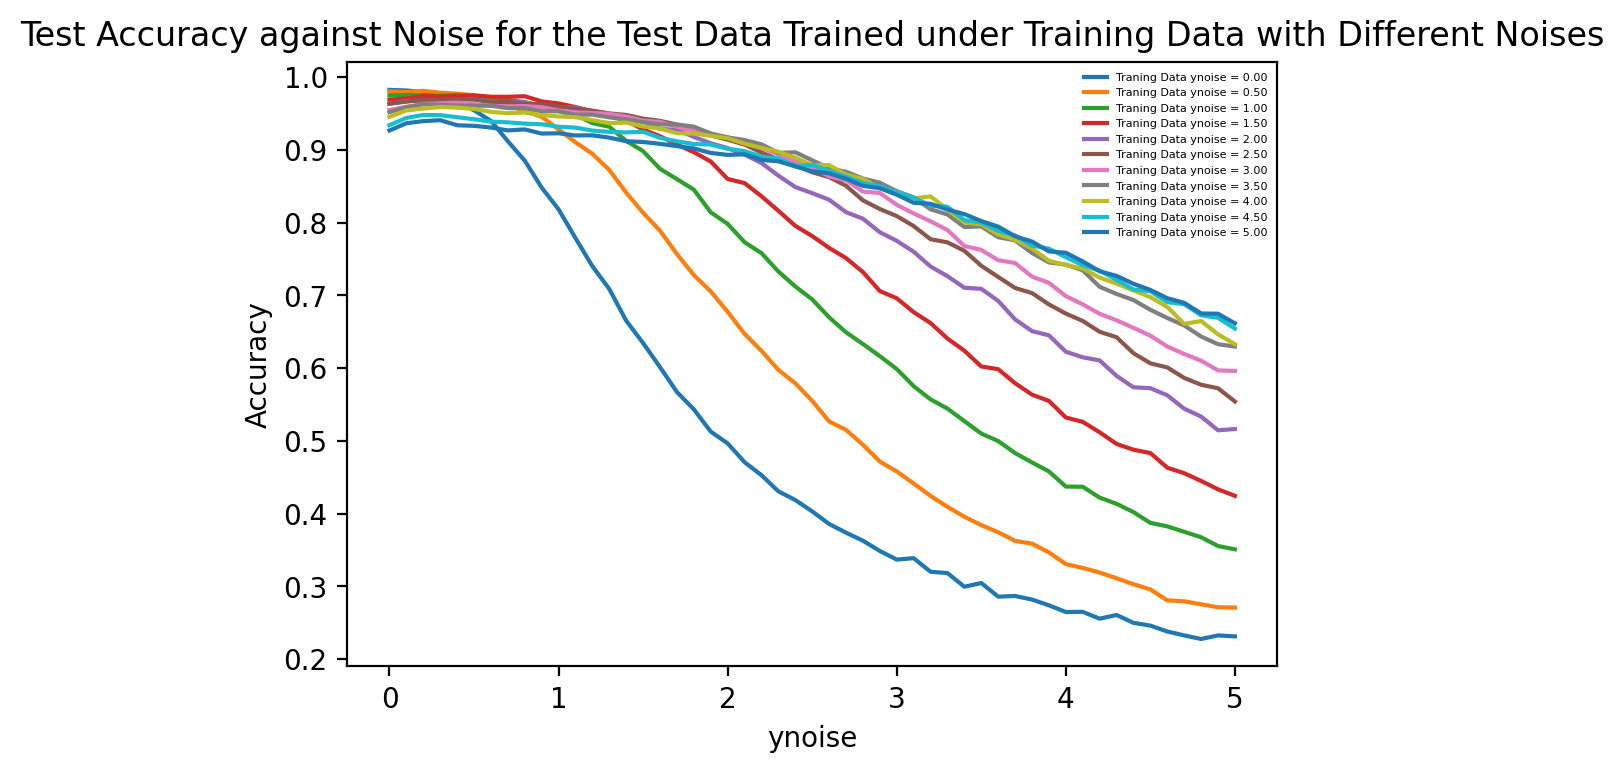

In [13]:
train_noise = np.linspace(0,5,11) #noise to add to training data
for j in range(11): #a for loop to input the different noise to training data
    
    #use smaller no. of epoch for the training data to save power: 
    history=model.fit(images_with_noise(train_images, train_noise[j]), train_labels,batch_size=100, epochs=10)
    clear_output() #to clear 'history' once finished
    
    ynoise_values = np.linspace(0,5,51) #noise to add to test data
    test_accuracy = []
    for i in range(51): #a for loop to input the different noise to test data (like before)
        test_loss, test_acc = model.evaluate(images_with_noise(test_images,  ynoise_values[i]),  test_labels, verbose=2)
        clear_output(wait=True) #to clear test_acc once finished
        test_accuracy.append(test_acc)
    
    plt.plot(np.linspace(0,5,51), test_accuracy, label = "Traning Data ynoise = {:.2f}".format(train_noise[j]))
    
plt.title("Test Accuracy against Noise for the Test Data Trained under Training Data with Different Noises")
plt.xlabel("ynoise")
plt.ylabel("Accuracy")
plt.legend(prop={'size':4})
plt.show()

#### Comments:

The network maintains better accuracy, with more noise, when the training data has more noise. This is expected because nueral networks perform better when they have been trained with noisy data.

We can also plot the test accuracy against epoch for the no-noise test data trained under training data with different noises. This is another indication as to the best level of noise to add to your training dataset to maximise the performance.

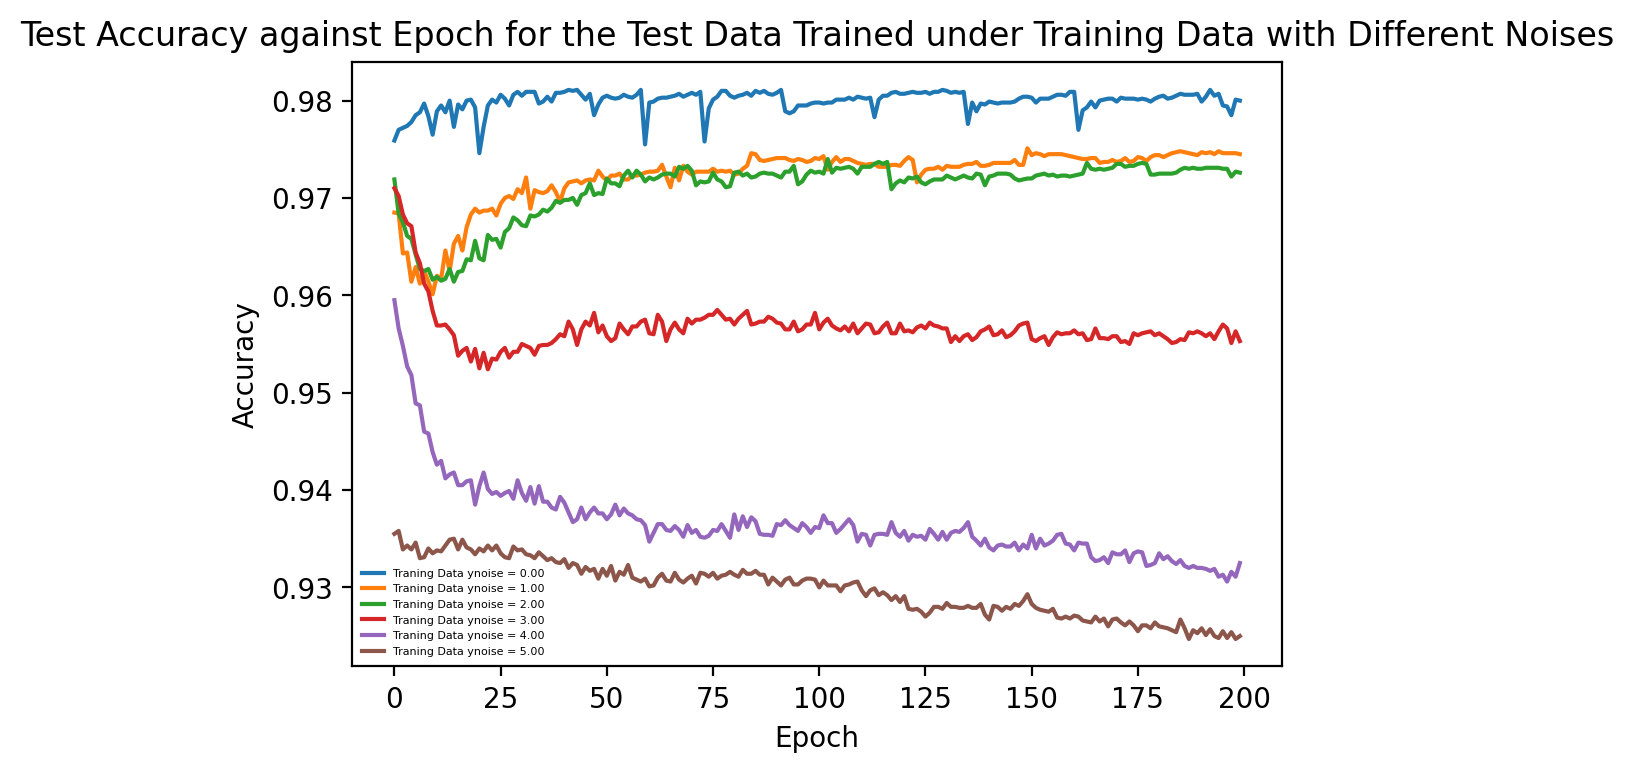

In [14]:
train_noise = np.linspace(0,5,6) #noise to add to training data

for j in range(6):
    history=model.fit(images_with_noise(train_images, train_noise[j]), train_labels,batch_size=100, epochs=200, validation_data=(test_images, test_labels))
    clear_output() #to clear 'history' once finished
    
    plt.plot(history.history['val_accuracy'], label = "Traning Data ynoise = {:.2f}".format(train_noise[j]))

plt.title("Test Accuracy against Epoch for the Test Data Trained under Training Data with Different Noises")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(prop={'size':4})
plt.show()

### Conclusion

#### How would you define performance and what is the ynoise for best perfomance?

The most accurate definition would be, a network which can maintain accuracy of test data even with more noise. From the first plot (plot above the one above), we can see that when more noise is added to the training data, the accurcy of the test data is maintained even with more noise. Therefore, it is fair to conclude that adding more noise to the training data, will improve performance. Thus, 5.00 ynoise added to the training data, provides the best performance.

Another definintion could be that performace is accuracy increasing overtime (ie over long epochs) to an acceptable level, above ~95% and the accuracy is maintained over long epochs. With this definition, we can see that the training data with 2.00 ynoise (plot above) has an increase in accuracy overtime and, given more epochs, would likley match the no-noise trainig data (which is just maintaining its accuracy). Adding more noise would start the accuracy at a lower level and would eventually decrease after its peak (most evident in ynoise= 5.00).

However, these two defnintions lead to different conclusions. I prefer the first defnition because it is more consistent.

# References:

[1]Nichol. R 2021. " Week3_MNIST_TF.ipynb". [Online] UCL Moodle resource. Available from https://moodle.ucl.ac.uk/course/view.php?id=6793 [accessed 26th October 2021] 